In [4]:
import numpy as np
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt

from cluster import Cluster
from load_mcxc_data import load_clusters

In [13]:
cluster=load_clusters(1)[0]

In [14]:
def tau_crit(m_chi): # returns values between 3/2 and 3
    mu=const.m_p.to(u.GeV)/m_chi
    tau= -mu + 3/2 + np.sqrt(mu**2 + mu+9/4)
    
    return tau

In [15]:
tau_crit(1*u.GeV)

<Quantity 2.54411509>

In [28]:
n=100
fxs = np.logspace(-4, 0, n)
mxs = cluster.m_chi

m, f = np.meshgrid(mxs, fxs)

#tau_b = np.zeros((n,n))
#tau_crit = np.zeros((n,n))
tau_b_gt_tau_crit = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        #int_time[i, j] = interaction_time(m[i, j]*u.GeV, f[i, j], test_cluster)
        #int_time_above_1Gyr[i, j] = 1 if int_time[i,j].value >= 1 else 0
        tau_b = cluster.baryon_temp/cluster.virial_temperature(m[i, j], f_chi=f[i, j])
        tau_b_gt_tau_crit[i, j] = 1 if tau_b>tau_crit(m[i, j]) else 0


(0.1, 100.0)

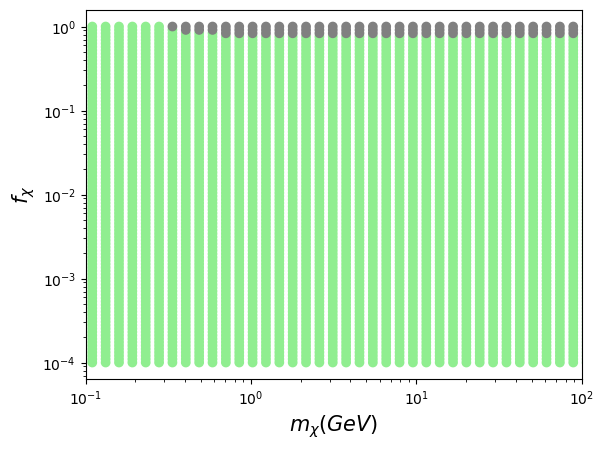

In [31]:
from matplotlib import colors
plt.scatter(m, f, c=tau_b_gt_tau_crit, cmap=colors.ListedColormap(['gray', 'lightgreen']))
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$m_{\chi} (GeV)$', size=15)
plt.ylabel(r'$f_{\chi}$', size=15)
plt.xlim(1e-1, 1e2)